# FILM INDUSTRY ANALYSIS

* Author: Joan Kabura Njoroge
* Course: Data Science Full Time
* Scheduled project review date/time: May 28, 2021
* Instructor name: Mark Tiba
* Blog post URL:

# 1. BUSINESS UNDERSTANDING
## 1.1. Business problem:
Microsoft wants to get in on the fun of huge firms producing original video content. Although they don't have any experience making movies, they have chosen to start a new film production company.My task is to research the categories of movies that are currently performing the best at the box office. I'll then turn those discoveries into useful information that the CEO of Microsoft's new film company may use to select what kinds of movies to make.

## 1.2. Success Indicator:
1. Does the length of the movie determine if the movie with have a high average rating?
2. How are the domestic and international markets similar?
3. Which movie genres are now making the most money at the box office?
4. Does a movie's running time have an impact on how well it does financially and how    popular it is?
5. What categories are most popular right now?

# 2. DATA UNDERSTANDING
## 2.1. Importing the relevant packages


In [298]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf

%matplotlib inline

pysqldf = lambda q: sqldf(q, globals())

# 2.2. Reading the datasets


In [299]:
import sqlite3
conn = sqlite3.connect('Data/im.db')

imdb_df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
imdb_df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [300]:
movie_gross_df = pd.read_csv('Data/bom.movie_gross.csv')
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [301]:
movie_info_df = pd.read_table('Data/movie_info.tsv', index_col=0)
movie_info_df.head(3)

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


In [302]:
reviews_df = pd.read_table('Data/reviews.tsv', index_col=0, encoding='windows-1252')

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 3 to 2000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      48869 non-null  object
 1   rating      40915 non-null  object
 2   fresh       54432 non-null  object
 3   critic      51710 non-null  object
 4   top_critic  54432 non-null  int64 
 5   publisher   54123 non-null  object
 6   date        54432 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.3+ MB


In [303]:
tmdb_movies_df = pd.read_csv('Data/tmdb_movies.csv', index_col=0)
tmdb_movies_df.head()


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [304]:
tn_movie_budgets_df = pd.read_csv('Data/tn_movie_budgets.csv', index_col=0)
tn_movie_budgets_df.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# 2.3 Exploring the datasets

## 2.3.1. Data Undrstanding
First, we look into the different tables in the imdb database.
* Directors table

In [305]:
# one movie can have multiple directors
# query the db for directors table
q = """
SELECT *
FROM directors
;
"""
directors = pd.read_sql(q, conn)
directors.tail(3)

,movie_id,person_id
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248
291173,tt9004986,nm4993825


In [306]:
# query the db for known_for table
q = """
SELECT *
FROM movie_akas
;
"""
movie_akas = pd.read_sql(q, conn)
movie_akas.isna().sum(0)

movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

Findings about the directors table:
1. movie_id is the primary key
2. one movie_id can have multiple person_id i.e multiple directors

* Persons table

In [307]:
# query the db for persons table
q = """
SELECT *
FROM persons
;
"""
persons = pd.read_sql(q, conn)
persons.tail()

,person_id,primary_name,birth_year,death_year,primary_profession
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer"


In [308]:
persons.nunique()

person_id             606648
primary_name          577203
birth_year               267
death_year               214
primary_profession      8647
dtype: int64

In [309]:
persons[persons['primary_name'].duplicated()].sort_values(by = 'primary_name')

,person_id,primary_name,birth_year,death_year,primary_profession
279631,nm4062141,A. Venkatesh,NaN,NaN,"director,actor,writer"
156216,nm1701176,A. Venkatesh,NaN,NaN,"cinematographer,camera_department,editor"
387377,nm8956236,A. Venkatesh,NaN,NaN,producer
436444,nm6758318,A.J. Khan,NaN,NaN,producer
565680,nm7645047,A.K. Azad,NaN,NaN,"music_department,composer"
...,...,...,...,...,...
290560,nm3216359,Óscar Pérez,NaN,NaN,"producer,director,writer"
446899,nm7114545,Özer Kiziltan,NaN,NaN,cinematographer
433984,nm6356309,Özgür Bakar,NaN,NaN,"director,writer,producer"
603769,nm8122779,Øystein Mamen,NaN,NaN,cinematographer


In [310]:
persons['primary_profession'].str.contains('director').sum()

146033

In [311]:
# query the db for principals table
q = """
SELECT *
FROM principals
;
"""
principals = pd.read_sql(q, conn)
principals.head(3)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None


Findings about the persons table:
1. person_id is the primary key of the persons table
2. person_id is the foreign key of the directors, principals table.
3. the same name has been used on multiple person_id and profession, suggesting that one person may have played different roles in different movies. THough we are only interested in the director profession which appears 146033 times

APPROACH:
the directors table and persons table can be useful in determining the highest rated directors using the person_id

* Movie_basics table

In [312]:
q = """
SELECT *
FROM movie_basics
;
"""
movie_basics = pd.read_sql(q, conn)
movie_basics.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [313]:
# fins all the years in the table
# see if they are valid formats
movie_basics.start_year.unique()


array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2024, 2026, 2025, 2115, 2027], dtype=int64)

We can see that there are more entries in the movie_id column than the primary_title column. Suggesting that there may be some movies repeated 

In [314]:
movie_basics[movie_basics['primary_title'].duplicated()].tail(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146053,tt9903716,Jessie,Jessie,2019,106.0,"Horror,Thriller"
146068,tt9905256,The Cross,The Cross,2012,NaN,Thriller
146078,tt9906218,Unstoppable,Unstoppable,2019,84.0,Documentary
146106,tt9910778,DK Bose,DK Bose,2019,117.0,Comedy
146117,tt9913418,Fragments,Fragments,2019,NaN,"Drama,Mystery,Sci-Fi"
146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller"
146120,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama"
146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama


In [315]:
movie_basics[movie_basics['primary_title'] == 'Albatross']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
9094,tt1541149,Albatross,Albatross,2011,90.0,Drama
53042,tt3128706,Albatross,Albatross,2015,89.0,"Comedy,Drama,Sport"
146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary


In [316]:
movie_basics[movie_basics['primary_title'] == 'The Rehearsal']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
99621,tt5820812,The Rehearsal,The Rehearsal,2016,102.0,Drama
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama


In [317]:
movie_basics[movie_basics['primary_title'] == 'Bacchanalia']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
53806,tt3167458,Bacchanalia,Bacchanalia,2017,101.0,"Comedy,Horror"
146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller"


Findings about the movie_basics table:
1. Primary key: movie_id
2. Foreign Key: movie_id linking to the directors table.
3. It is confirmed that there are duplicate entries in the primary_title column with different movie_ids, start_year, runtime_minutes and genres.
4. One major problem with the duplicate primary_titles is that the start_year are different on different rows and would be hard to determine which start_year should be used in analyses.
5. the start year also seems to have entries in future dates. Such data can be regarded as false and is necessary to be dropped
6. Some movies have multiple genres. Can be important to consider when determining the most profitable genre. We can split the text.




*  Movie_ratings table

In [318]:
# query the db for movie_ratings table
q = """
SELECT *
FROM movie_ratings
;
"""
movie_ratings = pd.read_sql(q, conn)
movie_ratings.head(3)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [319]:
# search for duplicate rows. 
print(movie_ratings.duplicated().sum())


0


In [320]:
movie_basics[movie_basics['movie_id'] == 'tt9894098']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
145992,tt9894098,Sathru,Sathru,2019,129.0,Thriller


In [321]:
directors[directors['movie_id'] == 'tt9894098']

,movie_id,person_id
141058,tt9894098,nm10529107


In [322]:
# here we confirm the relationship between the movie_basic,directors, persons, movies_basics tables
persons[persons['person_id'] == 'nm10529107']


,person_id,primary_name,birth_year,death_year,primary_profession
50054,nm10529107,Naveen Nanjundan,NaN,NaN,director


Findings about the movie_ratings table:
1. Primary Key: movie_id
2. Foreign Key: movie_id linking to the directors, principals and movie_basics tables
3. average rating may be used to estimate popularity of each film.

# 3. DATA CLEANING
This section describes various steps to clean the data to answer specific questions and as such will highlight the question to be investigated, datasets used and ends with a summary of inferences made for each question

## 3.1. CLEANING THE IMDB database

In [323]:
# first we will merge the differnt tables

movie_table_q = """
SELECT 
    movie_id,
    primary_title AS title,
    start_year AS release_year,
    runtime_minutes ,
    genres,
    averagerating AS avg_rating,
    numvotes

FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
;
"""
moviesTable = pd.read_sql(movie_table_q, conn)
moviesTable.head(10)

,movie_id,title,release_year,runtime_minutes,genres,avg_rating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [324]:
# join the tables principals,  to get specific directors 
directors_table_query = """
SELECT 
    movie_id,
    primary_name AS director
FROM principals
JOIN persons
    USING(person_id)
WHERE category = 'director'

;
"""
directorsTable = pd.read_sql(directors_table_query,conn)
directorsTable.head(3)

,movie_id,director
0,tt0111414,Frank Howson
1,tt0323808,Robin Hardy
2,tt0417610,Alejandro Chomski


In [325]:
directorsTable = directorsTable.drop_duplicates()

In [326]:

directorsTable = directorsTable.groupby('movie_id')['director'].apply(list)
directorsTable.head()


movie_id
tt0063540              [Harnam Singh Rawail]
tt0066787                        [Mani Kaul]
tt0069049                     [Orson Welles]
tt0069204             [Hrishikesh Mukherjee]
tt0100275    [Raoul Ruiz, Valeria Sarmiento]
Name: director, dtype: object

One movie can have multiple directors and would be useful to put all directors of a movie based on movie_id as a list


In [327]:
actors_table_query = """
SELECT 
    movie_id,
    primary_name AS actor
FROM principals
JOIN persons
    USING(person_id)
WHERE category = 'actor'
;
"""
actorsTable = pd.read_sql(actors_table_query, conn)

actorsTable = actorsTable.drop_duplicates()

actorsTable = actorsTable.groupby('movie_id')['actor'].apply(list)
actorsTable.head()


movie_id
tt0063540       [Dilip Kumar, Balraj Sahni, Sanjeev Kumar]
tt0066787                      [Arun Khopkar, Om Shivpuri]
tt0069049                 [John Huston, Peter Bogdanovich]
tt0069204    [Rabi Ghosh, Vijay Arora, Asrani, Utpal Dutt]
tt0100275                  [Luis Alarcón, Francisco Reyes]
Name: actor, dtype: object

In [328]:
imdb_table1 = pd.merge(moviesTable, directorsTable, how='left', on='movie_id')

imdb_Table = pd.merge(imdb_table1, actorsTable, how='left', on='movie_id')

imdb_Table.isna().sum()

movie_id               0
title                  0
release_year           0
runtime_minutes     7620
genres               804
avg_rating             0
numvotes               0
director            6099
actor              15856
dtype: int64

In [329]:
imdb_Table[imdb_Table['title'].str.contains('-|:|;')].sample(5)

,movie_id,title,release_year,runtime_minutes,genres,avg_rating,numvotes,director,actor
24803,tt2430356,Pearl: The Assassin,2013,80.0,"Action,Crime,Thriller",2.6,114,[Guy Patton],"[Marcus Bishop-Wright, Justin Brown, Erickson ..."
32874,tt3166476,Zone Pro Site: The Moveable Feast,2013,145.0,Comedy,6.5,525,[Yu-Hsun Chen],"[Jieh-Wen King, Tony Yo-ning Yang, Nien-Jen Wu..."
32175,tt3109366,Rise of the Eco-Warriors,2014,105.0,"Action,Adventure,Documentary",8.1,58,[Cathy Henkel],NaN
48717,tt4798558,Romantic Warriors III: Canterbury Tales,2015,118.0,"Documentary,Music",9.2,5,"[Adele Schmidt, Jose Zegarra Holder]","[Daevid Allen, Roy Babbington, Raven Bush, Dir..."
55525,tt5644904,Feats First: The Life & Music of Lowell George,2015,131.0,Documentary,8.1,19,[Elio Espana],"[Barney Hoskyns, George Massenburg, Van Dyke P..."


In [330]:
# fill NaN runtime rows with the median 
imdb_Table['runtime_minutes'].fillna(imdb_Table['runtime_minutes'].median(), inplace = True)
imdb_Table.head()


,movie_id,title,release_year,runtime_minutes,genres,avg_rating,numvotes,director,actor
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,[Harnam Singh Rawail],"[Dilip Kumar, Balraj Sahni, Sanjeev Kumar]"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,[Mani Kaul],"[Arun Khopkar, Om Shivpuri]"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,[Orson Welles],"[John Huston, Peter Bogdanovich]"
3,tt0069204,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",6.1,13,[Hrishikesh Mukherjee],"[Rabi Ghosh, Vijay Arora, Asrani, Utpal Dutt]"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,"[Raoul Ruiz, Valeria Sarmiento]","[Luis Alarcón, Francisco Reyes]"


In [331]:
# drop rows whose start year are future dates > 2024
imdb_Table.drop(imdb_Table[imdb_Table.release_year > 2024].index, inplace = True)

In [332]:
imdb_Table.release_year.unique()

array([2013, 2019, 2018, 2017, 2010, 2011, 2012, 2015, 2016, 2014],
      dtype=int64)

In [333]:
imdb_Table[imdb_Table['title'].duplicated()].tail(3)

,movie_id,title,release_year,runtime_minutes,genres,avg_rating,numvotes,director,actor
73845,tt9906218,Unstoppable,2019,84.0,Documentary,8.1,8,[Nick Willing],NaN
73853,tt9914642,Albatross,2017,91.0,Documentary,8.5,8,[Chris Jordan],NaN
73855,tt9916160,Drømmeland,2019,72.0,Documentary,6.5,11,[Joost van der Wiel],NaN


# 3.2 CLEANING THE tn_movie_budgets 
It would be useful to see what movies made high profits. 

In [334]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [335]:
tn_movie_budgets_df['movie'].duplicated().sum()

84

In [336]:
tn_movie_budgets_df[tn_movie_budgets_df['movie'].duplicated()]

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
74,"May 19, 1998",Godzilla,"$125,000,000","$136,314,294","$376,000,000"
9,"Nov 21, 2018",Robin Hood,"$99,000,000","$30,824,628","$84,747,441"
85,"Jul 8, 2005",Fantastic Four,"$87,500,000","$154,696,080","$333,132,750"
44,"May 7, 1999",The Mummy,"$80,000,000","$155,385,488","$416,385,488"
8,"Jun 13, 1997",Hercules,"$70,000,000","$99,112,101","$250,700,000"
...,...,...,...,...,...
69,"Nov 16, 1942",Cat People,"$134,000","$4,000,000","$8,000,000"
77,"Oct 1, 1968",Night of the Living Dead,"$114,000","$12,087,064","$30,087,064"
78,"Feb 8, 1915",The Birth of a Nation,"$110,000","$10,000,000","$11,000,000"


We need to find out if this is valid data before working with the data. Duplicate movies can be because of different versions, different years with different financial information.
We also need to look at formatting of the movie title to match the ones in the imdb_Table so as to retain even more data when merging on the title column.

In [337]:
tn_movie_budgets_df[tn_movie_budgets_df['movie'].str.contains('Part')].head(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
39,"Nov 20, 2015",The Hunger Games: Mockingjay - Part 2,"$160,000,000","$281,723,902","$648,986,787"
25,"Nov 16, 2012","The Twilight Saga: Breaking Dawn, Part 2","$136,200,000","$292,324,737","$829,724,737"
57,"Nov 18, 2011","The Twilight Saga: Breaking Dawn, Part 1","$127,500,000","$281,287,133","$689,420,051"


In [338]:
imdb_Table[imdb_Table['title'].str.contains('Part')].head(3)

,movie_id,title,release_year,runtime_minutes,genres,avg_rating,numvotes,director,actor
116,tt0452664,Party Crashers,2012,88.0,Comedy,5.4,907,[Andrucha Waddington],"[Marcelo Adnet, Eduardo Sterblitch, Stepan Ner..."
147,tt0469021,Alan Partridge,2013,90.0,"Action,Comedy,Crime",6.9,27986,[Declan Lowney],"[Steve Coogan, Colm Meaney, Tim Key, Karl Theo..."
171,tt0480239,Atlas Shrugged: Part I,2011,97.0,"Drama,Mystery,Sci-Fi",5.7,12524,[Paul Johansson],"[Grant Bowler, Matthew Marsden, Edi Gathegi]"


In [339]:
tn_movie_budgets_df[tn_movie_budgets_df['movie'].str.contains('Ep')].head(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
4,"May 19, 1999",Star Wars Ep. I: The Phantom Menace,"$115,000,000","$474,544,677","$1,027,044,677"


In [340]:
imdb_Table[imdb_Table['title'].str.contains('Star Wars')].head(3)

,movie_id,title,release_year,runtime_minutes,genres,avg_rating,numvotes,director,actor
21144,tt2275656,Star Wars: Threads of Destiny,2014,110.0,"Action,Adventure,Sci-Fi",4.1,486,[Rasmus Tirzitis],"[Patrik Hont, Karl Lindqvist]"
25595,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,136.0,"Action,Adventure,Fantasy",8.0,784780,[J.J. Abrams],"[John Boyega, Oscar Isaac, Domhnall Gleeson]"
26070,tt2527336,Star Wars: The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",7.1,462903,[Rian Johnson],"[John Boyega, Mark Hamill]"


We note that the in both dataframes the naming conventions are no consistent and thus we need to do more cleaning so as to use all the data.
We see that:
1. Sometimes the title name are recorded using Roman numerals and other use Arabic numerals
2. Punctuations are also not consistent
3. The use of 'Ep' instead of 'Episode' 

In [341]:
# remove the punctuation and replace
tn_movie_budgets_df['movie'] = tn_movie_budgets_df['movie'].str.replace(r'[^\w\s]+', '')
imdb_Table['title'] = imdb_Table['title'].str.replace(r'[^\w\s]+', '')


In [342]:
imdb_Table.dtypes

movie_id            object
title               object
release_year         int64
runtime_minutes    float64
genres              object
avg_rating         float64
numvotes             int64
director            object
actor               object
dtype: object

In [343]:
# Roman to Integer in Python
# The other way around would replace letter I with 1:
# REF: https://stackoverflow.com/questions/6116978/how-to-replace-multiple-substrings-of-a-string

def romanToInt(title_name, roman_nums_dict):
    for i, j in roman_nums_dict.items():
        title_name = title_name.str.replace(i, j)
    return title_name

roman_nums_dict = {'I': '1', 'II': '2', 'III': '3', 'IV': '4','V': '5', 'VI': '6', 'VII': '7','VIII': '8','IX': '9','X': '10'}
title_name = imdb_Table['title']
imdb_Table['title'] = romanToInt(title_name, roman_nums_dict)

movie_name = tn_movie_budgets_df['movie']
tn_movie_budgets_df['movie'] = romanToInt(movie_name, roman_nums_dict)

imdb_Table.iloc[25595]

# tn_movie_budgets_df.head(10)


movie_id                                              tt2488496
title                  Star Wars Episode 511  The Force Awakens
release_year                                               2015
runtime_minutes                                             136
genres                                 Action,Adventure,Fantasy
avg_rating                                                    8
numvotes                                                 784780
director                                          [J.J. Abrams]
actor              [John Boyega, Oscar Isaac, Domhnall Gleeson]
Name: 25595, dtype: object

##### not complete

In [344]:
# replace Ep with Episode
tn_movie_budgets_df['movie'] = tn_movie_budgets_df['movie'].str.replace('Ep.','Episode', regex=False)
imdb_Table['title'] = imdb_Table['title'].str.replace('Ep.','Episode', regex=False) # regex=False: Match and extract exact string pattern from the text



In [345]:
imdb_Table.tail()

,movie_id,title,release_year,runtime_minutes,genres,avg_rating,numvotes,director,actor
73851,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6,[Giancarlo Soldi],"[Luciano Scarpa, Riccardo Mei]"
73852,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,NaN,"[Ahmet Faik Akinci, Metin Keçeci, Burhan Sirma..."
73853,tt9914642,Albatross,2017,91.0,Documentary,8.5,8,[Chris Jordan],NaN
73854,tt9914942,La vida sense la Sara Amat,2019,91.0,None,6.6,5,[Laura Jou],"[Isaac Alcayde, Joan Amargós, Pau Escobar]"
73855,tt9916160,Drømmeland,2019,72.0,Documentary,6.5,11,[Joost van der Wiel],NaN


Next we need to account for duplicates. we find that Godzilla has two differnt years. 
i wouuld deal with these values by concatenating the year to the title..to be able to differentiate the two title.



In [346]:
tn_movie_budgets_df[tn_movie_budgets_df['movie'] == 'Godzilla'] 

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
41,"May 16, 2014",Godzilla,"$160,000,000","$200,676,069","$529,076,069"
74,"May 19, 1998",Godzilla,"$125,000,000","$136,314,294","$376,000,000"


In [347]:
# Before adding the year to the name for these specific movies, let's convert release year into string
# The function below does not work with str() unless you save the variable as string type first. 
# concatenate the two columns

imdb_Table['title'] = imdb_Table['title'].astype(str) + " " + imdb_Table['release_year'].astype(str)

imdb_Table.head()


,movie_id,title,release_year,runtime_minutes,genres,avg_rating,numvotes,director,actor
0,tt0063540,Sunghursh 2013,2013,175.0,"Action,Crime,Drama",7.0,77,[Harnam Singh Rawail],"[Dilip Kumar, Balraj Sahni, Sanjeev Kumar]"
1,tt0066787,One Day Before the Rainy Season 2019,2019,114.0,"Biography,Drama",7.2,43,[Mani Kaul],"[Arun Khopkar, Om Shivpuri]"
2,tt0069049,The Other Side of the Wind 2018,2018,122.0,Drama,6.9,4517,[Orson Welles],"[John Huston, Peter Bogdanovich]"
3,tt0069204,Sabse Bada Sukh 2018,2018,91.0,"Comedy,Drama",6.1,13,[Hrishikesh Mukherjee],"[Rabi Ghosh, Vijay Arora, Asrani, Utpal Dutt]"
4,tt0100275,The Wandering Soap Opera 2017,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,"[Raoul Ruiz, Valeria Sarmiento]","[Luis Alarcón, Francisco Reyes]"


We notice that some movies from really old to be included in this analysis as tastes may have changed over the centuries, the value of money as well has changed over the years.


In [348]:
# doing the same for the tn_movie_budgets table
# first we would need to extract the release year from the release date to have a column of 
# start_year in the tn_movie_budgets_df

# convert the release_date to datetime
tn_movie_budgets_df['release_date'] = pd.to_datetime(tn_movie_budgets_df['release_date'])
tn_movie_budgets_df['release_year'] = tn_movie_budgets_df['release_date'].dt.year

tn_movie_budgets_df['movie'] = tn_movie_budgets_df['movie'].astype(str) + " " + tn_movie_budgets_df['release_year'].astype(str)

# # drop rows of years that are too far back in the past
# tn_movie_budgets_df.drop(tn_movie_budgets_df[tn_movie_budgets_df.release_year < 2000 ].index, inplace = True)

tn_movie_budgets_df.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
id,,,,,,
1,2009-12-18,Avatar 2009,"$425,000,000","$760,507,625","$2,776,345,279",2009
2,2011-05-20,Pirates of the Caribbean On Stranger Tides 2011,"$410,600,000","$241,063,875","$1,045,663,875",2011
3,2019-06-07,Dark Phoenix 2019,"$350,000,000","$42,762,350","$149,762,350",2019
4,2015-05-01,Avengers Age of Ultron 2015,"$330,600,000","$459,005,868","$1,403,013,963",2015
5,2017-12-15,Star Wars Ep 5111 The Last Jedi 2017,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [349]:
tn_movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
id,,,,,,
1,2009-12-18,Avatar 2009,"$425,000,000","$760,507,625","$2,776,345,279",2009
2,2011-05-20,Pirates of the Caribbean On Stranger Tides 2011,"$410,600,000","$241,063,875","$1,045,663,875",2011
3,2019-06-07,Dark Phoenix 2019,"$350,000,000","$42,762,350","$149,762,350",2019
4,2015-05-01,Avengers Age of Ultron 2015,"$330,600,000","$459,005,868","$1,403,013,963",2015
5,2017-12-15,Star Wars Ep 5111 The Last Jedi 2017,"$317,000,000","$620,181,382","$1,316,721,747",2017


We would like to use the production budget, dometic_gross, worldwide_gross but they are given as object data type.

In [350]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].astype('string')
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].astype('string')
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].astype('string')

tn_movie_budgets_df.dtypes

release_date         datetime64[ns]
movie                        object
production_budget            string
domestic_gross               string
worldwide_gross              string
release_year                  int64
dtype: object

In [351]:
# we remove the $ sign and the commas and conver string to integer
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace(',', '').str.replace('$', '')
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.replace(',', '').str.replace('$', '')
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].str.replace(',', '').str.replace('$', '')

# finally we would need to convert these columns into integer to be able to use them in plotting
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].astype('int64')
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].astype('int64')
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].astype('int64')

tn_movie_budgets_df.dtypes

release_date         datetime64[ns]
movie                        object
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
release_year                  int64
dtype: object

# 4. MERGING THE FINAL DATATSETS

In [353]:
final_movie_info_table = imdb_Table.merge(tn_movie_budgets_df, left_on='title', right_on='movie', how='inner')
final_movie_info_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1520 entries, 0 to 1519
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           1520 non-null   object        
 1   title              1520 non-null   object        
 2   release_year_x     1520 non-null   int64         
 3   runtime_minutes    1520 non-null   float64       
 4   genres             1518 non-null   object        
 5   avg_rating         1520 non-null   float64       
 6   numvotes           1520 non-null   int64         
 7   director           1463 non-null   object        
 8   actor              1463 non-null   object        
 9   release_date       1520 non-null   datetime64[ns]
 10  movie              1520 non-null   object        
 11  production_budget  1520 non-null   int64         
 12  domestic_gross     1520 non-null   int64         
 13  worldwide_gross    1520 non-null   int64         
 14  release_

In [354]:
# clean the resultsing dataset
# drop redundant rows
final_movie_info_table.drop(['movie', 'release_year_y'], axis=1, inplace=True)

final_movie_info_table.rename(columns = {'release_year_x':'release_year'}, inplace = True)

final_movie_info_table.head()

,movie_id,title,release_year,runtime_minutes,genres,avg_rating,numvotes,director,actor,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight 2012,2012,91.0,"Action,Animation,Comedy",1.9,8248,[Lawrence Kasanoff],[Charlie Sheen],2012-12-31,45000000,0,73706
1,tt0359950,The Secret Life of Walter Mitty 2013,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,NaN,"[Ben Stiller, Jon Daly]",2013-12-25,91000000,58236838,187861183
2,tt0365907,A Walk Among the Tombstones 2014,2014,114.0,"Action,Crime,Drama",6.5,105116,[Scott Frank],"[Liam Neeson, Dan Stevens, David Harbour, Boyd...",2014-09-19,28000000,26017685,62108587
3,tt0369610,Jurassic World 2015,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,[Colin Trevorrow],"[Chris Pratt, Ty Simpkins]",2015-06-12,215000000,652270625,1648854864
4,tt0376136,The Rum Diary 2011,2011,119.0,"Comedy,Drama",6.2,94787,[Bruce Robinson],"[Johnny Depp, Giovanni Ribisi, Aaron Eckhart, ...",2011-10-28,45000000,13109815,21544732


In [356]:
final_movie_info_table.release_year.unique()


array([2012, 2013, 2014, 2015, 2011, 2010, 2019, 2016, 2017, 2018],
      dtype=int64)

# 5. DATA MODELING
We need to create other dependant variables to assess the profitability.
Will create other columns allowing to calculate profit 

In [370]:
# create profit and return on investment column
final_movie_info_table['profit'] = final_movie_info_table['worldwide_gross'] - final_movie_info_table['production_budget'] 
final_movie_info_table['return_on_investment'] = ( (final_movie_info_table['worldwide_gross'] - final_movie_info_table['production_budget'])\
                       / final_movie_info_table['production_budget'] )*100

print(final_movie_info_table['profit'].median())
print(final_movie_info_table['return_on_investment'].median())
print(final_movie_info_table['production_budget'].quantile(q=(0,.25,.5, .75, 1)))

23214408.0
112.34689740740741
0.00        15000.0
0.25      8000000.0
0.50     23000000.0
0.75     56525000.0
1.00    410600000.0
Name: production_budget, dtype: float64


In [371]:
final_movie_info_table.head()

,movie_id,title,release_year,runtime_minutes,genres,avg_rating,numvotes,director,actor,release_date,production_budget,domestic_gross,worldwide_gross,profit,retrun_on_investment,return_on_investment,budget_bins,roi_bins,profit_bins
0,tt0249516,Foodfight 2012,2012,91.0,"Action,Animation,Comedy",1.9,8248,[Lawrence Kasanoff],[Charlie Sheen],2012-12-31,45000000,0,73706,-44926294,-99.836209,-99.836209,$16-40 M,< 50%,< 6.6 M
1,tt0359950,The Secret Life of Walter Mitty 2013,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,NaN,"[Ben Stiller, Jon Daly]",2013-12-25,91000000,58236838,187861183,96861183,106.440860,106.440860,$40-425 M,< 50%,> 6.6 M
2,tt0365907,A Walk Among the Tombstones 2014,2014,114.0,"Action,Crime,Drama",6.5,105116,[Scott Frank],"[Liam Neeson, Dan Stevens, David Harbour, Boyd...",2014-09-19,28000000,26017685,62108587,34108587,121.816382,121.816382,$16-40 M,> 50%,> 6.6 M
3,tt0369610,Jurassic World 2015,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,[Colin Trevorrow],"[Chris Pratt, Ty Simpkins]",2015-06-12,215000000,652270625,1648854864,1433854864,666.909239,666.909239,$40-425 M,> 50%,> 6.6 M
4,tt0376136,The Rum Diary 2011,2011,119.0,"Comedy,Drama",6.2,94787,[Bruce Robinson],"[Johnny Depp, Giovanni Ribisi, Aaron Eckhart, ...",2011-10-28,45000000,13109815,21544732,-23455268,-52.122818,-52.122818,$16-40 M,< 50%,< 6.6 M


,movie_id,title,release_year,runtime_minutes,genres,avg_rating,numvotes,director,actor,release_date,production_budget,domestic_gross,worldwide_gross,profit,retrun_on_investment,return_on_investment,budget_bins
0,tt0249516,Foodfight 2012,2012,91.0,"Action,Animation,Comedy",1.9,8248,[Lawrence Kasanoff],[Charlie Sheen],2012-12-31,45000000,0,73706,-44926294,-99.836209,-99.836209,$16-40 M
1,tt0359950,The Secret Life of Walter Mitty 2013,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,NaN,"[Ben Stiller, Jon Daly]",2013-12-25,91000000,58236838,187861183,96861183,106.440860,106.440860,$40-425 M
2,tt0365907,A Walk Among the Tombstones 2014,2014,114.0,"Action,Crime,Drama",6.5,105116,[Scott Frank],"[Liam Neeson, Dan Stevens, David Harbour, Boyd...",2014-09-19,28000000,26017685,62108587,34108587,121.816382,121.816382,$16-40 M
3,tt0369610,Jurassic World 2015,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,[Colin Trevorrow],"[Chris Pratt, Ty Simpkins]",2015-06-12,215000000,652270625,1648854864,1433854864,666.909239,666.909239,$40-425 M
4,tt0376136,The Rum Diary 2011,2011,119.0,"Comedy,Drama",6.2,94787,[Bruce Robinson],"[Johnny Depp, Giovanni Ribisi, Aaron Eckhart, ...",2011-10-28,45000000,13109815,21544732,-23455268,-52.122818,-52.122818,$16-40 M


In [366]:

success_metric = final_movie_info_table.pivot_table(index=['roi_profit_bins'],
                                         values=['return_on_investment'],
                                         columns=['budget_bins'],
                                         aggfunc=['median','count']) 
success_metric = success_metric.style.format("{:.2f}").background_gradient(cmap='Blues', low=0, high=0.75)
success_metric

KeyError: 'roi_profit_bins'

# 4. Data ANALYSIS

# Q1. Is there a correlation between the runtime and the rating?
Here we would like to determine the if the optimal length range of a movie for it to be more popular.

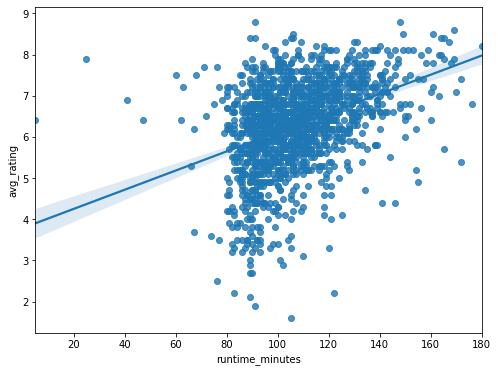

In [358]:
# data visualization
fig, ax1 = plt.subplots(figsize=(8, 6))
sns.regplot(data = final_movie_info_table, x ='runtime_minutes', y='avg_rating', ax=ax1);


It is evident that there is positive correlation between the length of the movie with the chances of getting a high rating.

,movie_id,title,release_year,runtime_minutes,genres,avg_rating,numvotes,director,actor
27683,tt2659636,Modern Times Forever 2011,2011,14400.0,Documentary,6.2,69,"[Bjornstjerne Reuter Christiansen, Jakob Fenge...",[Nicolas Gaitan]
70280,tt8273150,Logistics 2012,2012,51420.0,Documentary,5.0,17,"[Daniel Andersson, Erika Magnusson]",NaN


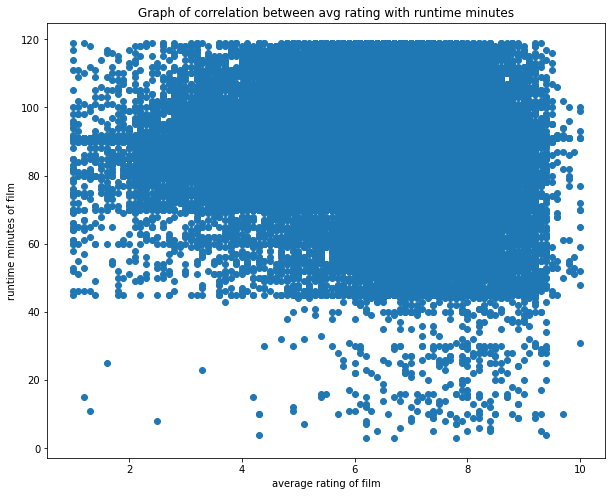

# Q2. Which has the 
Some of the genres column have multiple values separated by commas. It would be necessary to put them into separate columns before grouping them into their genre bins.

In [379]:
genre_movie_info_df = final_movie_info_table.copy()
genre_movie_info_df = genre_movie_info_df.drop(['runtime_minutes', 'numvotes', 'director', 'release_date'], axis=1)


# Dropping the 2 rows where Genre is null. 
genre_movie_info_df = genre_movie_info_df.dropna(subset=['genres']).reset_index(drop=True)

genre_movie_info_df['genres'] = genre_movie_info_df['genres'].str.split(',')
genre_movie_info_df = genre_movie_info_df.explode('genres') # .explode() adds more rows

# groupby
genre_movie_info_df.groupby("genres")['movie_id'].count().sort_values()

# genre_movie_info_df.head()


genres
Musical         10
Western         11
War             17
Sport           34
Documentary     38
History         39
Music           48
Family          97
Animation      103
Fantasy        125
Mystery        129
Biography      133
Sci-Fi         135
Horror         185
Romance        192
Crime          236
Thriller       265
Adventure      354
Action         453
Comedy         524
Drama          731
Name: movie_id, dtype: int64

In [387]:
# select those genres which produced at least 50 movies to be able to draw reliable conclusions:
genre_movie_info_df = genre_movie_info_df.groupby("genres").filter(lambda x: len(x) > 40) 
genre_movie_info_df.groupby("genres")['movie_id'].count()

genres
Action       453
Adventure    354
Animation    103
Biography    133
Comedy       524
Crime        236
Drama        731
Family        97
Fantasy      125
Horror       185
Music         48
Mystery      129
Romance      192
Sci-Fi       135
Thriller     265
Name: movie_id, dtype: int64

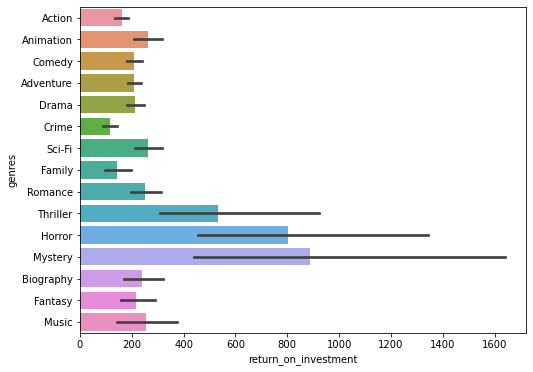

In [389]:
# data visualization
fig, ax1 = plt.subplots(figsize=(8, 6))
sns.barplot(data = genre_movie_info_df, x ='return_on_investment', y='genres', ax=ax1);


The graph of return on investment vs which genres suggests that the top 5 genres that have the highest return on investment are:
1. Mystery
2. Horror
3. Thriller
4. Music
5. Animation

This can be a valid inference as the making of such movies would require a higher budget to go into costumes, CGI/ graphics etc. 
Each of the top 5 probably had a high budget as all these come into play in their making

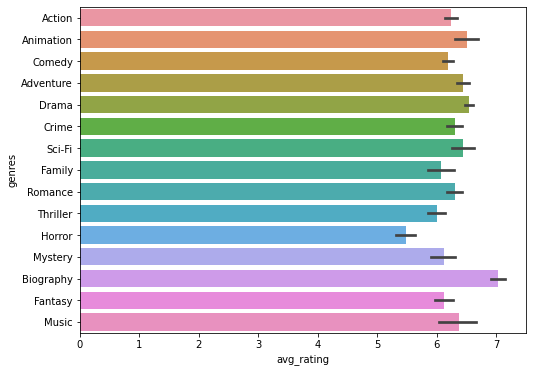

In [392]:
# data visualization
fig, ax1 = plt.subplots(figsize=(8, 6))
sns.barplot(data = genre_movie_info_df, x ='avg_rating', y='genres', ax=ax1);


This graph of genres to avg_rating shows that the top 5 more highly rated genres are:
1. Biography
2. Animation
3. Drama
4. sci-fi

# Q3: Which director has a history of average rating across

In [ ]:
genre_movie_info_df = final_movie_info_table.copy()
genre_movie_info_df = genre_movie_info_df.drop(['runtime_minutes', 'numvotes', 'director', 'release_date'], axis=1)


# Dropping the 2 rows where Genre is null. 
genre_movie_info_df = genre_movie_info_df.dropna(subset=['genres']).reset_index(drop=True)

genre_movie_info_df['genres'] = genre_movie_info_df['genres'].str.split(',')
genre_movie_info_df = genre_movie_info_df.explode('genres') # .explode() adds more rows

# groupby
genre_movie_info_df.groupby("genres")['movie_id'].count().sort_values()

In [ ]:
# We want to maintain all records, regardless of whether they receive a rating, thus we left join movie_ratings.
# Because we wish to maintain all documents, whether or not they have a director, we left join directors.
# Because we DO NOT want the individuals who are NOT directors in the dataset, we used inner join persons.

